In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Imported")

Imported


In [2]:
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import  DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression,Ridge, ElasticNet, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
print("Imported")


Imported


In [3]:
train = pd.read_csv("C:/Users/saran/OneDrive/Desktop/Bank-Term Deposit Subscription Prediction/Data Sets/bank-term.csv")
test = pd.read_csv("C:/Users/saran/OneDrive/Desktop/Bank-Term Deposit Subscription Prediction/Data Sets/test.csv")

In [4]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [5]:
test.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [6]:
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

train = train.drop(['contact'], axis=1)
test = test.drop(['contact'], axis=1)

In [7]:
train

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,29,services,single,secondary,no,1282,no,yes,4,jul,1006,2,-1,0,unknown,1
749996,69,retired,divorced,tertiary,no,631,no,no,19,aug,87,1,-1,0,unknown,0
749997,50,blue-collar,married,secondary,no,217,yes,no,17,apr,113,1,-1,0,unknown,0
749998,32,technician,married,secondary,no,-274,no,no,26,aug,108,6,-1,0,unknown,0


In [8]:
train.columns = train.columns.str.replace("_", " ").str.title()
test.columns = test.columns.str.replace("_", " ").str.title()

In [9]:
train.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays', 'Previous',
       'Poutcome', 'Y'],
      dtype='object')

In [10]:
train.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays', 'Previous',
       'Poutcome', 'Y'],
      dtype='object')

In [11]:
cols = ['Housing', 'Default', 'Loan']
train[cols] = train[cols].replace({'yes': 1, 'no': 0})


cols = ['Housing', 'Default', 'Loan']
test[cols] = test[cols].replace({'yes': 1, 'no': 0})

C:\Users\saran\AppData\Local\Temp\ipykernel_17140\137916613.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[cols] = train[cols].replace({'yes': 1, 'no': 0})
C:\Users\saran\AppData\Local\Temp\ipykernel_17140\137916613.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[cols] = test[cols].replace({'yes': 1, 'no': 0})


In [12]:
cols = ['Marital', 'Education', 'Poutcome', 'Job', 'Month']
ordinal = OrdinalEncoder()
train[cols] = ordinal.fit_transform(train[cols])

cols = ['Marital', 'Education', 'Poutcome', 'Job', 'Month']
ordinal = OrdinalEncoder()
test[cols] = ordinal.fit_transform(test[cols])

In [13]:
le = LabelEncoder()

for col in ['Housing', 'Loan', 'Default']:
    train[col] = le.fit_transform(train[col])

In [14]:
le = LabelEncoder()

for col in ['Housing', 'Loan', 'Default']:
    test[col] = le.fit_transform(test[col])

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[['Age', 'Balance', 'Duration', 'Campaign', 'Day']] = scaler.fit_transform(train[['Age', 'Balance', 'Duration', 'Campaign', 'Day']])


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test[['Age', 'Balance', 'Duration', 'Campaign', 'Day']] = scaler.fit_transform(test[['Age', 'Balance', 'Duration', 'Campaign', 'Day']])

In [18]:
test

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome
0,-0.886004,1.0,1.0,1.0,0,0.072797,1,0,0.591383,8.0,-0.115482,-0.580719,-1,0,3.0
1,0.304284,4.0,1.0,2.0,0,-0.428386,1,0,-1.588192,0.0,1.218324,-0.211668,-1,0,3.0
2,-0.489241,6.0,1.0,0.0,0,-0.419996,1,1,-0.377317,8.0,-0.531836,-0.211668,-1,0,3.0
3,1.692954,1.0,1.0,1.0,0,-0.940147,1,1,1.560083,8.0,-0.480252,-0.580719,-1,0,3.0
4,-1.282767,9.0,2.0,1.0,0,0.274510,1,0,0.712470,5.0,-0.273918,-0.580719,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.205093,4.0,1.0,2.0,0,-0.436775,1,0,0.228121,9.0,-0.701325,-0.211668,-1,0,3.0
249996,-0.092479,7.0,1.0,3.0,0,-0.246370,1,0,0.349208,9.0,1.015674,-0.580719,189,1,0.0
249997,2.188907,5.0,1.0,0.0,0,-0.424738,0,0,-1.588192,5.0,-0.284971,-0.580719,92,8,2.0
249998,0.899428,1.0,1.0,0.0,0,0.522183,1,0,1.681170,8.0,-0.340239,-0.211668,-1,0,3.0


In [19]:
train['Y'].value_counts()

Y
0    659512
1     90488
Name: count, dtype: int64

In [21]:
X = train.drop(['Y'], axis=1)
y = train['Y']

In [22]:

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [23]:
x_train

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome
6036,-0.685862,9.0,1.0,1.0,0,-0.514111,0,0,1.076594,1.0,-0.448456,0.523445,-1,0,3.0
617631,-0.784883,9.0,1.0,1.0,0,-0.140005,0,0,-0.983806,1.0,-0.459463,0.155597,-1,0,3.0
580701,-0.487819,1.0,1.0,1.0,0,-0.424904,1,0,0.834194,8.0,-0.309035,-0.580100,-1,0,3.0
696804,-1.577055,1.0,2.0,1.0,0,-0.197831,1,0,-0.620206,8.0,2.046449,0.155597,-1,0,3.0
316225,-0.982926,7.0,2.0,1.0,0,-0.211582,0,0,1.076594,5.0,-0.389752,-0.212251,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,-0.982926,4.0,2.0,2.0,0,-0.221102,1,0,1.440194,5.0,-0.492484,0.523445,181,2,0.0
365838,-0.982926,4.0,1.0,2.0,0,-0.424551,0,0,1.440194,1.0,-0.617229,0.155597,-1,0,3.0
131932,-1.081947,6.0,1.0,2.0,0,0.004913,1,1,0.955394,5.0,-0.763988,-0.580100,-1,0,3.0
671155,0.304353,9.0,1.0,1.0,0,-0.257773,0,1,1.803794,5.0,-0.657588,-0.212251,-1,0,3.0


In [24]:
model = DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced')
model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [25]:
predict = model.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, predict):.2f}")
print(f"Precision: {precision_score(y_test, predict):.2f}")
print(f"Recall: {recall_score(y_test, predict):.2f}")
print(f"F1 Score: {f1_score(y_test, predict):.2f}")


Accuracy: 0.83
Precision: 0.40
Recall: 0.92
F1 Score: 0.56


In [29]:
import pandas as pd

df_compare = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predict
})

df_compare.iloc[0:40]

,Actual,Predicted
404846,0,0
580313,0,1
552086,0,0
370876,0,0
239330,0,0
590719,0,0
491326,0,0
271448,0,0
430275,0,0
245481,0,0


In [30]:
import pickle


with open('Bank New model.pkl', 'wb') as file:  
    pickle.dump(model, file)


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predict)
cm

array([[160569,  37114],
       [  2067,  25250]])

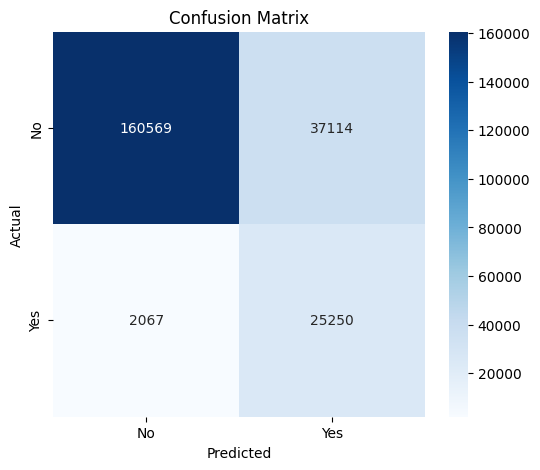

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = np.array([[160569,  37114],
       [  2067,  25250]])

class_names = ['No', 'Yes']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [1]:
import tensorflow as tf
print(tf.__version__)

c:\Users\saran\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\saran\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\saran\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

2.20.0


In [ ]:

# -------------------- Prediction --------------------
if st.button("🔮 Predict"):
    try:
        prediction = model.predict(input_df)[0]

        
        result = "Subscribe ✅" if prediction == 1 else "Not Subscribe ❌"
        st.success(f"Prediction: {result}")

        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(input_df)[0][1]
            st.info(f"Probability of subscribing: {proba*100:.2f}%")

    except Exception as e:
        st.error(f"❌ Prediction Error: {e}")

# -------------------- View Input Data --------------------
with st.expander("📄 View Input Data"):
    st.dataframe(input_df)

In [ ]:
# -------------------- Prediction --------------------
if st.button("🔮 Predict"):
    try:
        prediction = model.predict(input_df)[0]

        # ✅ Directly show model output (no if-else)
        st.success(f"Prediction: {prediction}")

        # Optional: show probability if available
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(input_df)[0][1]
            st.info(f"Probability of subscribing: {proba*100:.2f}%")

    except Exception as e:
        st.error(f"❌ Prediction Error: {e}")
